In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import random

In [2]:
x,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(x,columns=['col1','col2','col3','col4','col5'])
df['target'] = y

In [4]:
df.head()

,col1,col2,col3,col4,col5,target
0,-3.158338,-1.153745,4.234185,-1.712681,-2.130625,1
1,-1.016003,-2.629038,-0.183066,1.162123,3.629276,0
2,0.421983,2.836871,-1.520010,0.381187,-0.803479,1
3,0.262111,1.201962,3.759039,-2.473935,0.034519,0
4,-1.127085,0.591568,2.316945,-1.616299,-0.911521,1


### function for row sampling

In [5]:
def row_sampling(df,percentage):
    return df.sample(int(percentage*df.shape[0]),replace=True)

### function for column sampling

In [6]:
def feature_sampling(df,percentage):
    cols = random.sample(df.columns.tolist()[:-1], int(percentage*(df.shape[1]-1)))
    newdf = df[cols]
    newdf['target'] = df['target']
    return newdf

### function for both sampling

In [7]:
def combined_sampling(df,row_percent,col_percent):
  new_df = row_sampling(df,row_percent)
  return feature_sampling(new_df,col_percent)

## using only rowsampling

In [8]:
df1 = row_sampling(df,0.5)

In [9]:
df2 = row_sampling(df,0.5)

In [10]:
df3 = row_sampling(df,0.5)

In [11]:
df1.shape

(50, 6)

In [12]:
df2.shape

(50, 6)

In [13]:
df3.shape

(50, 6)

In [14]:
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

In [16]:
dt1.fit(df1.iloc[:,0:5], df1.iloc[:,-1])
dt2.fit(df2.iloc[:,0:5], df2.iloc[:,-1])
dt3.fit(df3.iloc[:,0:5], df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[4] <= -0.087\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.4, 0.5, 'x[2] <= 3.025\ngini = 0.133\nsamples = 28\nvalue = [2, 26]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

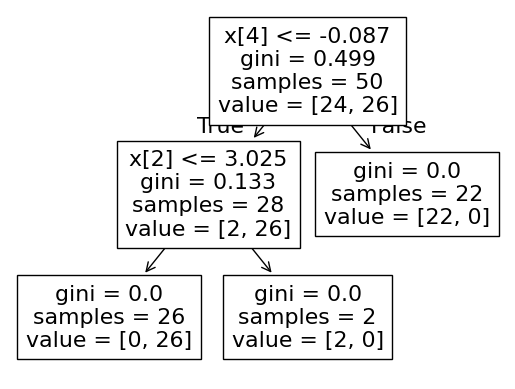

In [17]:
plot_tree(dt1)

[Text(0.6, 0.8333333333333334, 'x[4] <= -0.388\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.4, 0.5, 'x[3] <= -2.622\ngini = 0.137\nsamples = 27\nvalue = [2, 25]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

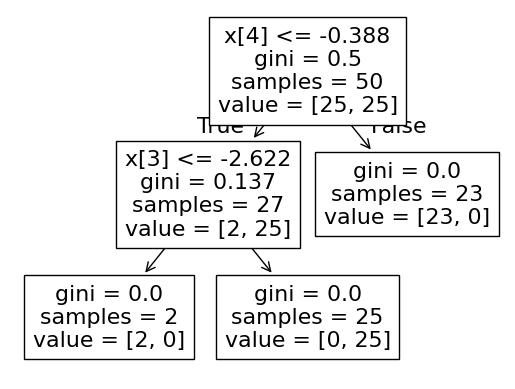

In [18]:
plot_tree(dt2)

[Text(0.6, 0.8333333333333334, 'x[4] <= -0.138\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.4, 0.5, 'x[3] <= -2.622\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

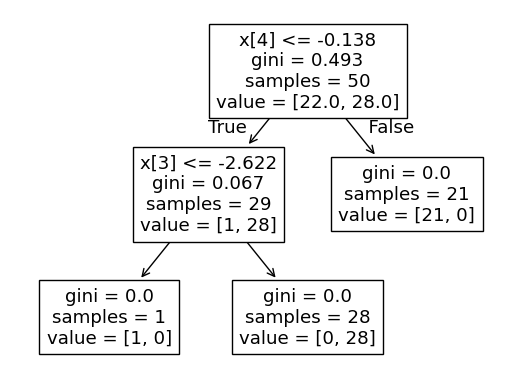

In [19]:
plot_tree(dt3)

In [20]:
df3.sample(1)

,col1,col2,col3,col4,col5,target
46,-0.327584,0.863992,-0.258267,-0.528182,-1.173204,1


### lets make them predict this randomly picked sample 

In [22]:
print(f"dt1 : {dt1.predict(np.array([-0.327584,0.863992,-0.258267,-0.528182,-1.173204]).reshape(1,5))}")
print(f"dt2 : {dt2.predict(np.array([-0.327584,0.863992,-0.258267,-0.528182,-1.173204]).reshape(1,5))}")
print(f"dt3 : {dt3.predict(np.array([-0.327584,0.863992,-0.258267,-0.528182,-1.173204]).reshape(1,5))}")

dt1 : [1]
dt2 : [1]
dt3 : [1]


/home/user550/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/user550/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/user550/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### so by majority count (random forest) the answer will be 1

## using only column sampling

In [23]:
df1 = feature_sampling(df,0.5)
df2 = feature_sampling(df,0.5)
df3 = feature_sampling(df,0.5)

/tmp/ipykernel_13958/2871346981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['target'] = df['target']
/tmp/ipykernel_13958/2871346981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['target'] = df['target']
/tmp/ipykernel_13958/2871346981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [24]:
df.shape

(100, 6)

In [25]:
df1.shape

(100, 3)

In [26]:
df2.shape

(100, 3)

In [27]:
df3.shape

(100, 3)

In [28]:
df3.sample(5)

,col3,col2,target
68,0.548382,-0.438555,0
58,2.373979,0.811279,0
45,1.021599,0.863985,1
50,3.051713,-1.098013,0
83,-1.547783,2.436699,1


In [29]:
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

In [30]:
dt1.fit(df1.iloc[:,0:2], df1.iloc[:,-1])
dt2.fit(df2.iloc[:,0:2], df2.iloc[:,-1])
dt3.fit(df3.iloc[:,0:2], df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.66, 0.9375, 'x[1] <= 0.428\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.4, 0.8125, 'x[1] <= -0.098\ngini = 0.358\nsamples = 60\nvalue = [46, 14]'),
 Text(0.53, 0.875, 'True  '),
 Text(0.28, 0.6875, 'x[0] <= -1.288\ngini = 0.21\nsamples = 42\nvalue = [37, 5]'),
 Text(0.24, 0.5625, 'x[1] <= -0.721\ngini = 0.375\nsamples = 20\nvalue = [15, 5]'),
 Text(0.16, 0.4375, 'x[0] <= -1.353\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.12, 0.3125, 'x[0] <= -3.129\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.08, 0.1875, 'x[1] <= -1.27\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.04, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.12, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16, 0.1875, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.2, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.32, 0.4375, 'x[1] <= -0.618\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.28, 0.3125, 'gini = 0.0\nsamples = 2\nval

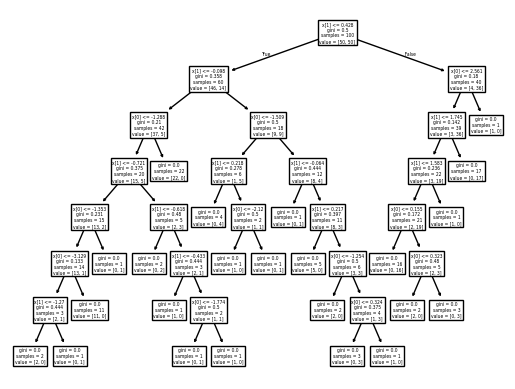

In [31]:
plot_tree(dt1)

[Text(0.6, 0.9285714285714286, 'x[0] <= -0.124\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.5, 0.7857142857142857, 'x[1] <= 2.359\ngini = 0.191\nsamples = 56\nvalue = [6, 50]'),
 Text(0.55, 0.8571428571428572, 'True  '),
 Text(0.2, 0.6428571428571429, 'x[0] <= -0.349\ngini = 0.043\nsamples = 46\nvalue = [1, 45]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 43\nvalue = [0, 43]'),
 Text(0.3, 0.5, 'x[0] <= -0.265\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.6428571428571429, 'x[0] <= -0.968\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.7, 0.5, 'x[1] <= 2.38\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.6, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.35714285714285715, 'x[0] <= -1.755\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.7, 0.21428571428571427, 'x[0] <= -1

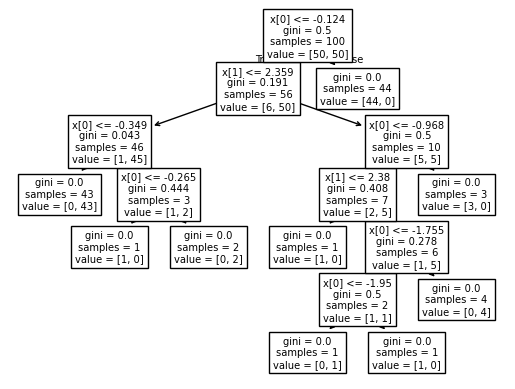

In [32]:
plot_tree(dt2)

[Text(0.6736111111111112, 0.9583333333333334, 'x[1] <= 0.428\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.5138888888888888, 0.875, 'x[1] <= -0.098\ngini = 0.358\nsamples = 60\nvalue = [46, 14]'),
 Text(0.59375, 0.9166666666666667, 'True  '),
 Text(0.3611111111111111, 0.7916666666666666, 'x[0] <= 2.219\ngini = 0.21\nsamples = 42\nvalue = [37, 5]'),
 Text(0.2222222222222222, 0.7083333333333334, 'x[0] <= -0.792\ngini = 0.108\nsamples = 35\nvalue = [33, 2]'),
 Text(0.1111111111111111, 0.625, 'x[1] <= -1.424\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.05555555555555555, 0.5416666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.16666666666666666, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= -2.634\ngini = 0.064\nsamples = 30\nvalue = [29, 1]'),
 Text(0.2777777777777778, 0.5416666666666666, 'x[1] <= -2.755\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2222222222222222, 0.4583333333333333, 'g

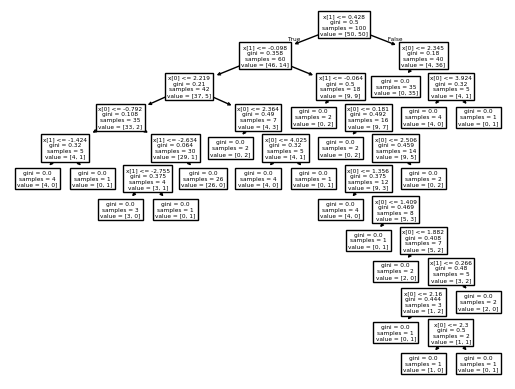

In [33]:
plot_tree(dt3)

#### lets make them predict using a randomly taken query point

In [34]:
df3.sample(1)

,col3,col2,target
95,-0.87069,2.235577,1


In [35]:
print(f"dt1 : {dt1.predict(np.array([-0.87069,2.235577]).reshape(1,2))}")
print(f"dt2 : {dt2.predict(np.array([-0.87069,2.235577]).reshape(1,2))}")
print(f"dt3 : {dt3.predict(np.array([-0.87069,2.235577]).reshape(1,2))}")

dt1 : [1]
dt2 : [1]
dt3 : [1]


/home/user550/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/user550/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/user550/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### you can see majority count will be used here and the answer will be 1

## using combined sampling

In [36]:
df1 = combined_sampling(df,0.5,0.5)
df2 = combined_sampling(df,0.5,0.5)
df3 = combined_sampling(df,0.5,0.5)

/tmp/ipykernel_13958/2871346981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['target'] = df['target']
/tmp/ipykernel_13958/2871346981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['target'] = df['target']
/tmp/ipykernel_13958/2871346981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [37]:
df1.shape

(50, 3)

In [38]:
df2.shape

(50, 3)

In [39]:
df3.shape

(50, 3)

In [40]:
df3.sample(5)

,col5,col3,target
71,-0.811012,1.744871,1
82,-0.496529,-1.787975,1
60,0.493273,-1.641546,0
52,1.194931,2.593327,0
95,-0.415582,-0.870690,1


In [41]:
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

In [42]:
dt1.fit(df1.iloc[:,0:-1], df1.iloc[:,-1])
dt2.fit(df2.iloc[:,0:-1], df2.iloc[:,-1])
dt3.fit(df3.iloc[:,0:-1], df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[1] <= -0.202\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.4, 0.5, 'x[0] <= -3.136\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

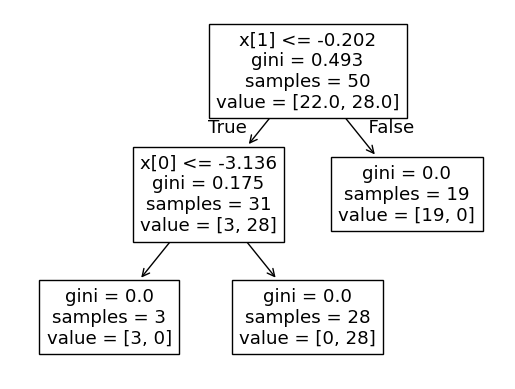

In [43]:
plot_tree(dt1)

[Text(0.4444444444444444, 0.9166666666666666, 'x[0] <= 0.244\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.2222222222222222, 0.75, 'x[0] <= -0.268\ngini = 0.133\nsamples = 28\nvalue = [26, 2]'),
 Text(0.3333333333333333, 0.8333333333333333, 'True  '),
 Text(0.1111111111111111, 0.5833333333333334, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[0] <= 0.045\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[1] <= -1.546\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.25, 'x[1] <= -1.158\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [

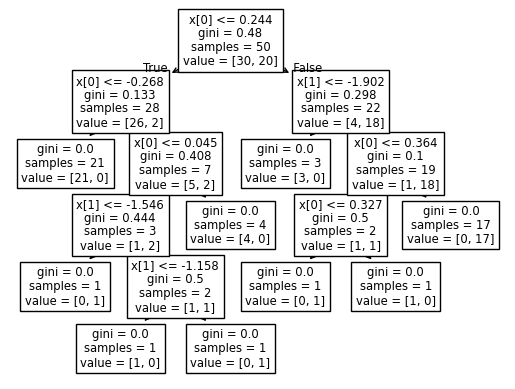

In [44]:
plot_tree(dt2)

[Text(0.6, 0.9, 'x[0] <= -0.124\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.4, 0.7, 'x[1] <= 2.137\ngini = 0.185\nsamples = 29\nvalue = [3, 26]'),
 Text(0.5, 0.8, 'True  '),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.6, 0.5, 'x[0] <= -0.778\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.3, 'x[0] <= -1.031\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.7, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.7, 0.8, '  False')]

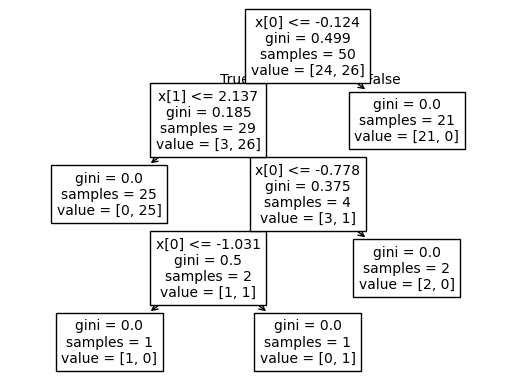

In [45]:
plot_tree(dt3)

### lets make them predict on a very random sample point

In [46]:
df3.sample(1)

,col5,col3,target
33,0.338208,0.506804,0


In [47]:
print(f"dt1 : {dt1.predict(np.array([0.338208,0.506804]).reshape(1,2))}")
print(f"dt2 : {dt2.predict(np.array([0.338208,0.506804]).reshape(1,2))}")
print(f"dt3 : {dt3.predict(np.array([0.338208,0.506804]).reshape(1,2))}")

dt1 : [0]
dt2 : [0]
dt3 : [0]


/home/user550/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/user550/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/user550/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### you can see the majority count will be used here and the answer will be 0